In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uk-road-safety-accidents-and-vehicles/Vehicle_Information.csv
/kaggle/input/uk-road-safety-accidents-and-vehicles/Accident_Information.csv


# Contexte

Chaque année, la vie d'environ 1,3 million de personnes est otée suite d'un accident de la route. Entre 20 et 50 millions de personnes souffrent de blessures non mortelles, sinon souffrent d'un handicap à la suite de leur blessure.
Les accidents de la route entraînent des pertes économiques considérables pour les individus, leurs familles et les nations dans leur ensemble. Ces pertes résultent du coût des traitements et de la perte de productivité des personnes tuées ou handicapées par leurs blessures, ainsi que des membres de la famille qui doivent s'absenter du travail ou de l'école pour s'occuper des blessés. Les accidents de la route coûtent à la plupart des pays 3 % de leur produit intérieur brut.
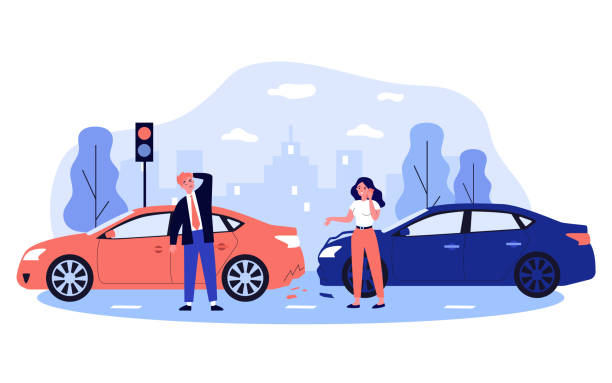


**Chiffres clés**

* Environ 1,3 million de personnes meurent chaque année suite d'un accident de la route.
* L'Assemblée générale des Nations unies a fixé un objectif ambitieux : réduire de moitié le nombre de décès et de blessures dus aux accidents de la route d'ici à 2030 (A/RES/74/299).
* Les accidents de la route coûtent à la plupart des pays 3 % de leur produit intérieur brut.
* Plus de la moitié des décès dus aux accidents de la route concernent des usagers vulnérables : piétons, cyclistes et motocyclistes.
* 93 % des décès sur les routes du monde se produisent dans les pays à revenu faible ou intermédiaire, alors que ces pays possèdent environ 60 % des véhicules du monde.
* Les accidents de la route sont la principale cause de décès chez les enfants et les jeunes adultes âgés de 5 à 29 ans.
* source

En regardant l'ensemble de données, nous pouvons l'analyser pour trouver des informations utiles sur les accidents qui se sont produits.

**Qu'est-ce que l'analyse exploratoire des données (AED) ?**

> **Qu'est-ce que l'analyse exploratoire des données ?**

L'analyse exploratoire des données (AED) est ce que les analystes de données font avec de grands ensembles de données, en recherchant des modèles et en résumant les principales caractéristiques de l'ensemble de données au-delà de ce qu'ils apprennent par la modélisation et les tests d'hypothèses. L'AED est une philosophie qui permet aux analystes de données d'aborder une base de données sans hypothèses. Lorsqu'un analyste de données utilise l'EDA, c'est comme s'il demandait aux données de lui dire ce qu'il ne sait pas.

Il s'agit d'une approche de l'analyse des données, qui utilise ces techniques :

* Optimiser la compréhension d'un ensemble de données.
* Découvrir les structures sous-jacentes.
* Extraire les variables importantes.
* Détecter les valeurs aberrantes et les anomalies.
* Tester les hypothèses sous-jacentes.
* Déterminer les paramètres optimaux des facteurs.



# EDA

In [3]:
# We import the usuals.
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns

# suppressmoccasin all warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
accidents = pd.read_csv('/kaggle/input/uk-road-safety-accidents-and-vehicles/Accident_Information.csv')

In [5]:
print('Le nombre d\'observartions: ', accidents.shape[0], '\nColumns:', accidents.shape[1])
accidents.head()

Le nombre d'observartions:  2047256 
Columns: 34


,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No


In [6]:
accidents['Date']= pd.to_datetime(accidents['Date'], format="%Y-%m-%d")

In [7]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047256 entries, 0 to 2047255
Data columns (total 34 columns):
 #   Column                                       Dtype         
---  ------                                       -----         
 0   Accident_Index                               object        
 1   1st_Road_Class                               object        
 2   1st_Road_Number                              float64       
 3   2nd_Road_Class                               object        
 4   2nd_Road_Number                              float64       
 5   Accident_Severity                            object        
 6   Carriageway_Hazards                          object        
 7   Date                                         datetime64[ns]
 8   Day_of_Week                                  object        
 9   Did_Police_Officer_Attend_Scene_of_Accident  float64       
 10  Junction_Control                             object        
 11  Junction_Detail                      

# Distribution of Accidents by Severity


In [26]:
# color schemes
urban_rural_cmap = ["dodgerblue", "lavender"]


In [27]:
# view numbers of major and non-major accidents (by definition of Safety team)
accidents.Accident_Severity.value_counts()

Slight     1734548
Serious     286339
Fatal        26369
Name: Accident_Severity, dtype: int64

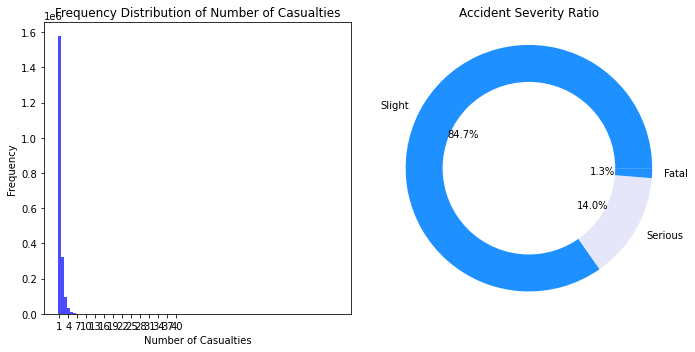

In [28]:
import matplotlib.gridspec as gs

# make figure
fig=plt.figure(figsize=(10,5))

# add grid axes
ax = plt.gca()
grid_layout = gs.GridSpec(ncols=2, nrows=1, figure=fig)
left = plt.subplot(grid_layout[0,0])
right = plt.subplot(grid_layout[0,1])

# draw distribution of number of casualties
casualty_count = accidents.Number_of_Casualties.value_counts()
left.bar(x=casualty_count.index, height=casualty_count.values, color="blue", alpha= 0.7)
left.set_xticks(np.arange(1,42,3))
left.set_xlabel("Number of Casualties")
left.set_ylabel("Frequency")
left.set_title("Frequency Distribution of Number of Casualties")


# plot pie chart of accident severity percents
severity_ratio = accidents.Accident_Severity.value_counts()
severity_ratio.plot.pie(autopct="%.1f%%", ax=right, colors=urban_rural_cmap)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
right.axis('equal')  
right.set_title("Accident Severity Ratio")
right.set_ylabel("")
plt.tight_layout()


**EDA** process can be broadly categorized as follows.

1. Location and Time.
1. Road characteristics. 
1. Weather and environmental influences.

# TIME

***Are there any patterns in the time of day/ day of the week when major incidents occur?***

On définit des tranches horaires qu'on estime  pertinentes
* Morning Rush de 5am à 10am
* Office Hours de 10am à 3pm (or: 10:00 - 15:00)
* Afternoon Rush de 3pm à 7pm (or: 15:00 - 19:00)
* Evening de 7pm à 11pm (or: 19:00 - 23:00)
* Night de 11pm à 5am (or: 23:00 - 05:00)

In [29]:
# define a function that turns the hours into daytime groups
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "morning rush (5-10)"
    elif hour >= 10 and hour < 15:
        return "office hours (10-15)"
    elif hour >= 15 and hour < 19:
        return "afternoon rush (15-19)"
    elif hour >= 19 and hour < 23:
        return "evening (19-23)"
    else:
        return "night (23-5)"

In [30]:
# apply this function to our temporary hour column
accidents['Daytime'] = accidents['Time'].apply(when_was_it)
accidents[['Time', 'Hour', 'Daytime']].head(8)

TypeError: '>=' not supported between instances of 'str' and 'int'

Text(0.5, 0, '   Sunday ,  Monday  ,Tuesday , Wednesday ,Thursday , Friday , Saturday')

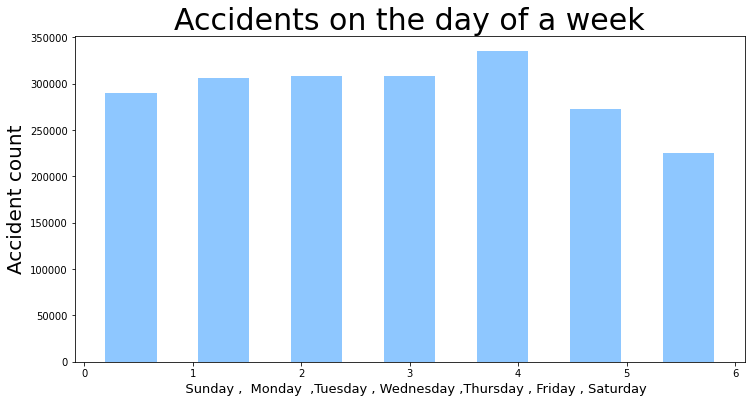

In [31]:
plt.figure(figsize=(12,6))
accidents.Date.dt.dayofweek.hist(bins=7,rwidth=0.55,alpha=0.5, color= 'dodgerblue')
plt.title('Accidents on the day of a week' , fontsize= 30)
plt.grid(False)
plt.ylabel('Accident count' , fontsize = 20)
plt.xlabel('   Sunday ,  Monday  ,Tuesday , Wednesday ,Thursday , Friday , Saturday' , fontsize = 13)

As we can see that thursday has the highest amount of accidents in this dataset from 2005 to 2014.
We have to keep in mind that accidents numbers could be depending on traffic amount on particular day.

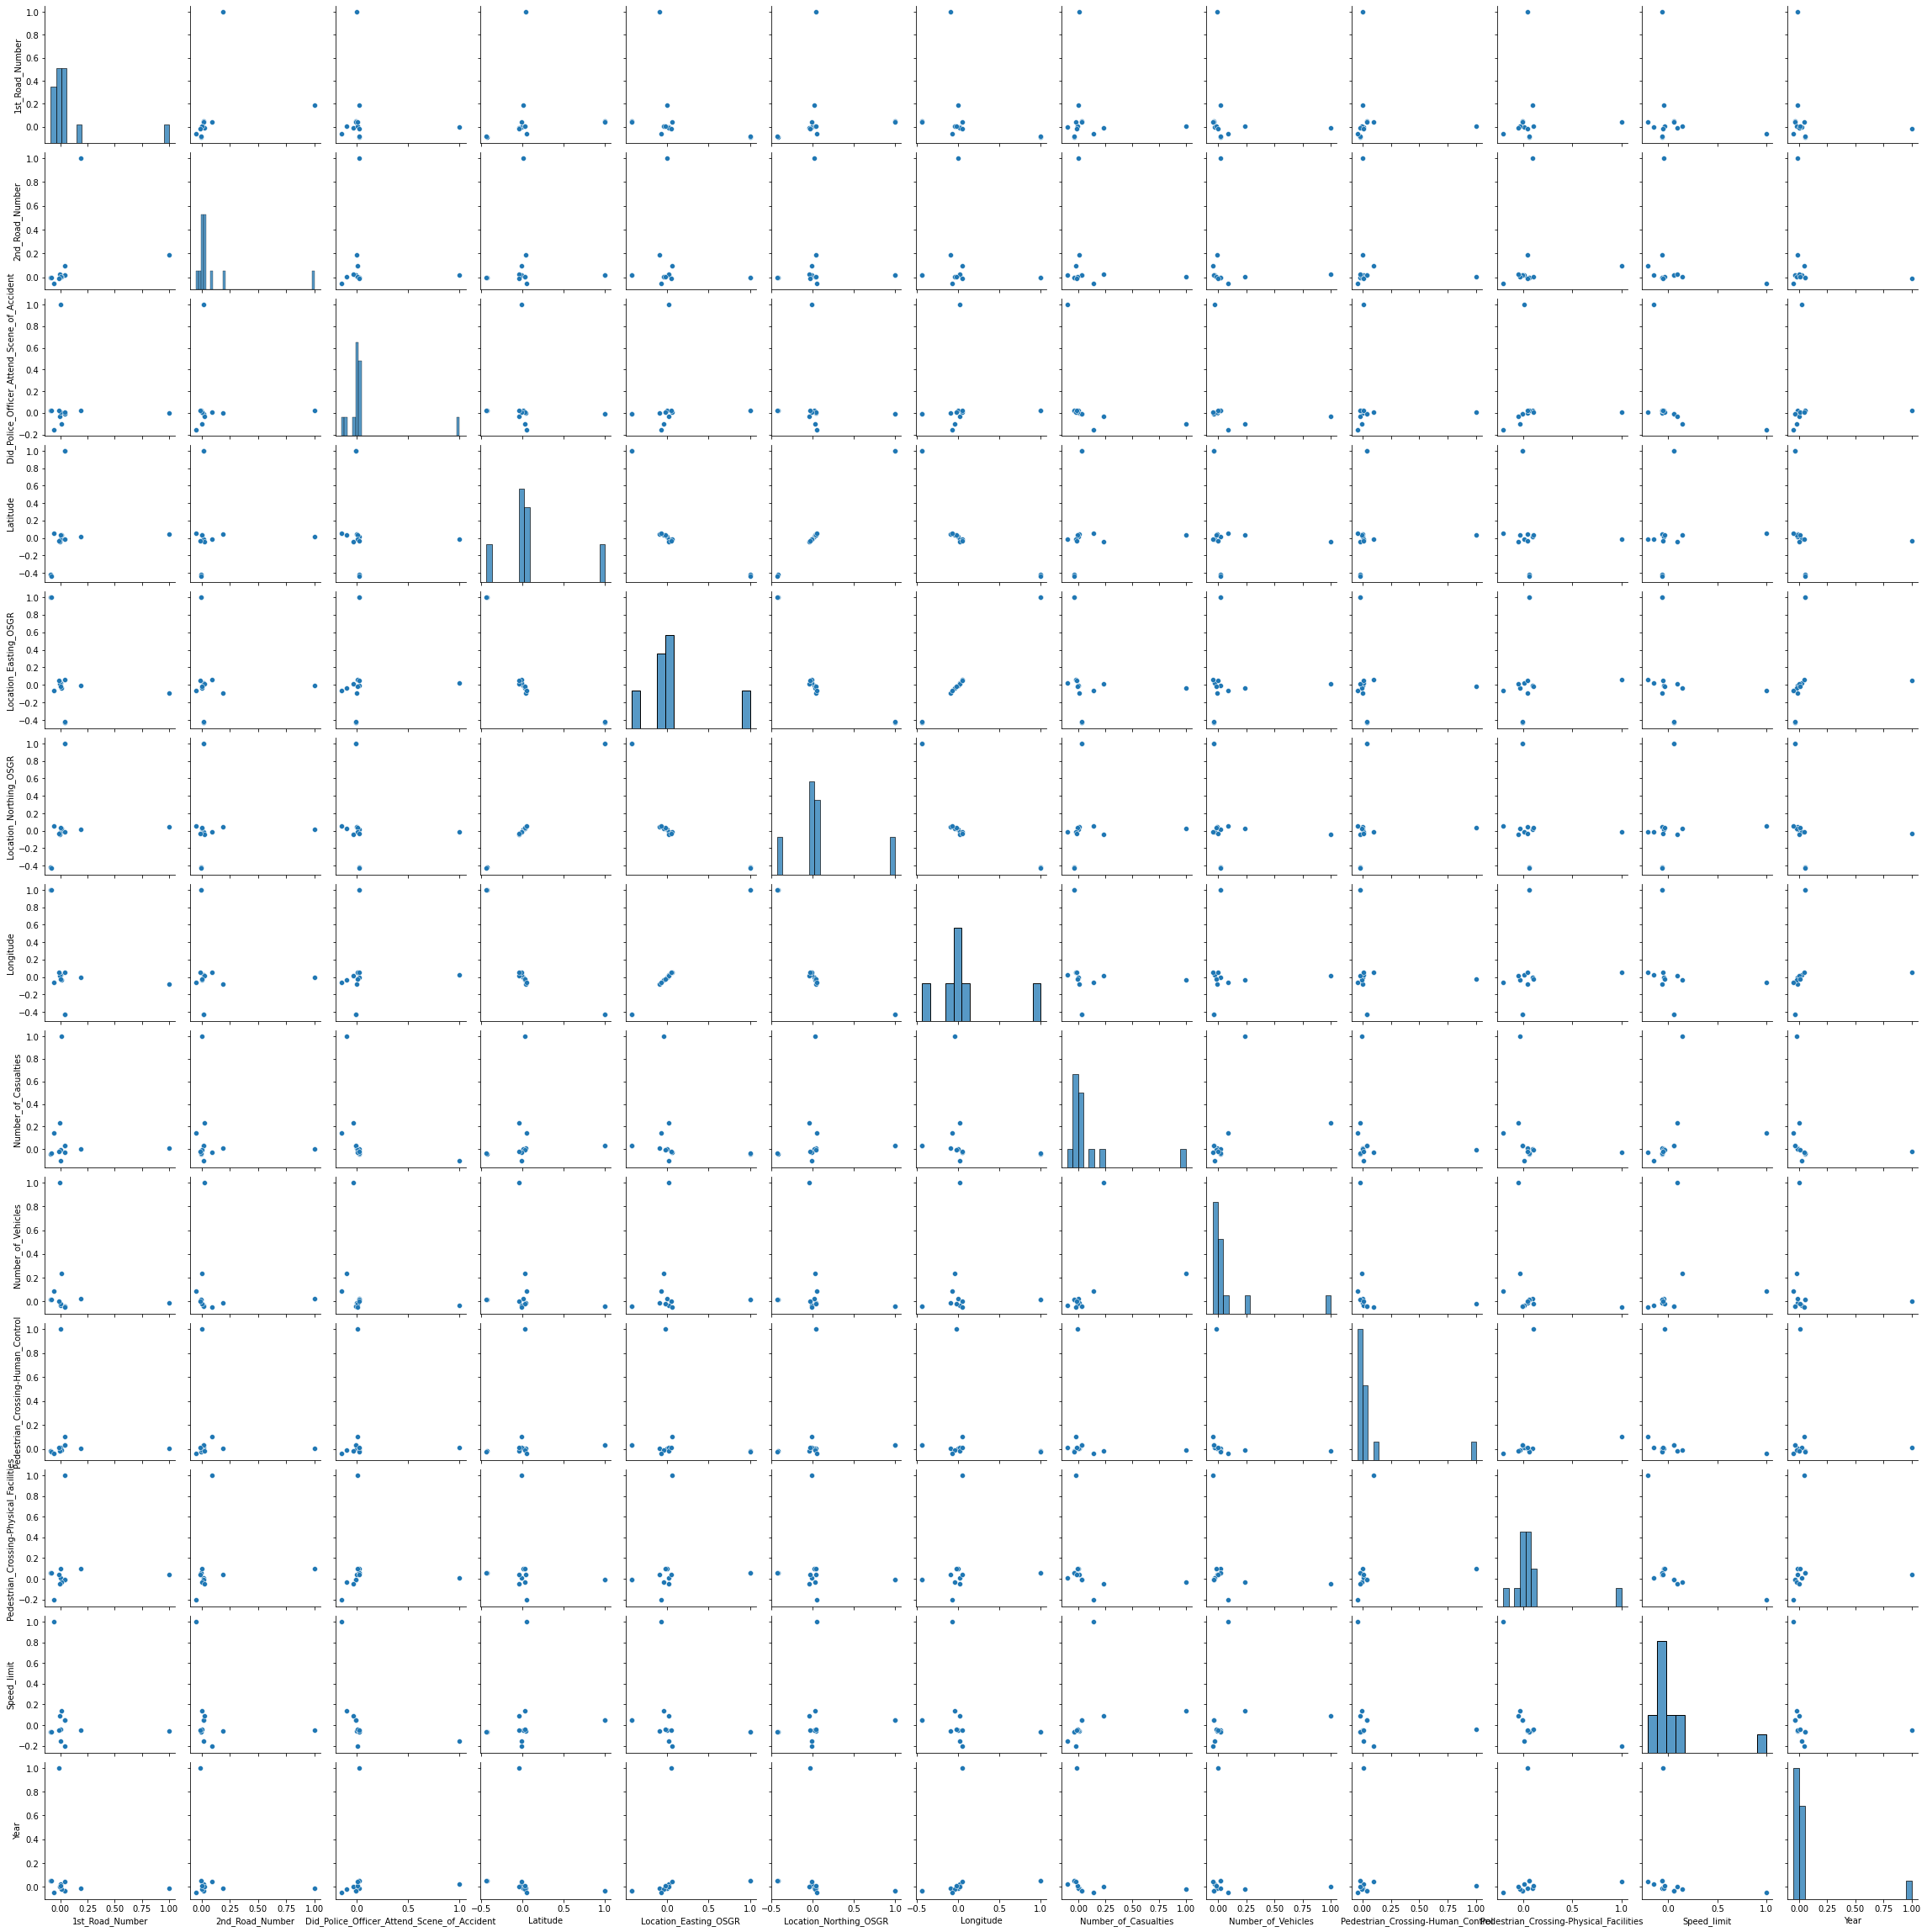

In [35]:
corr =  accidents.corr()
sns.pairplot(corr)

<AxesSubplot:>

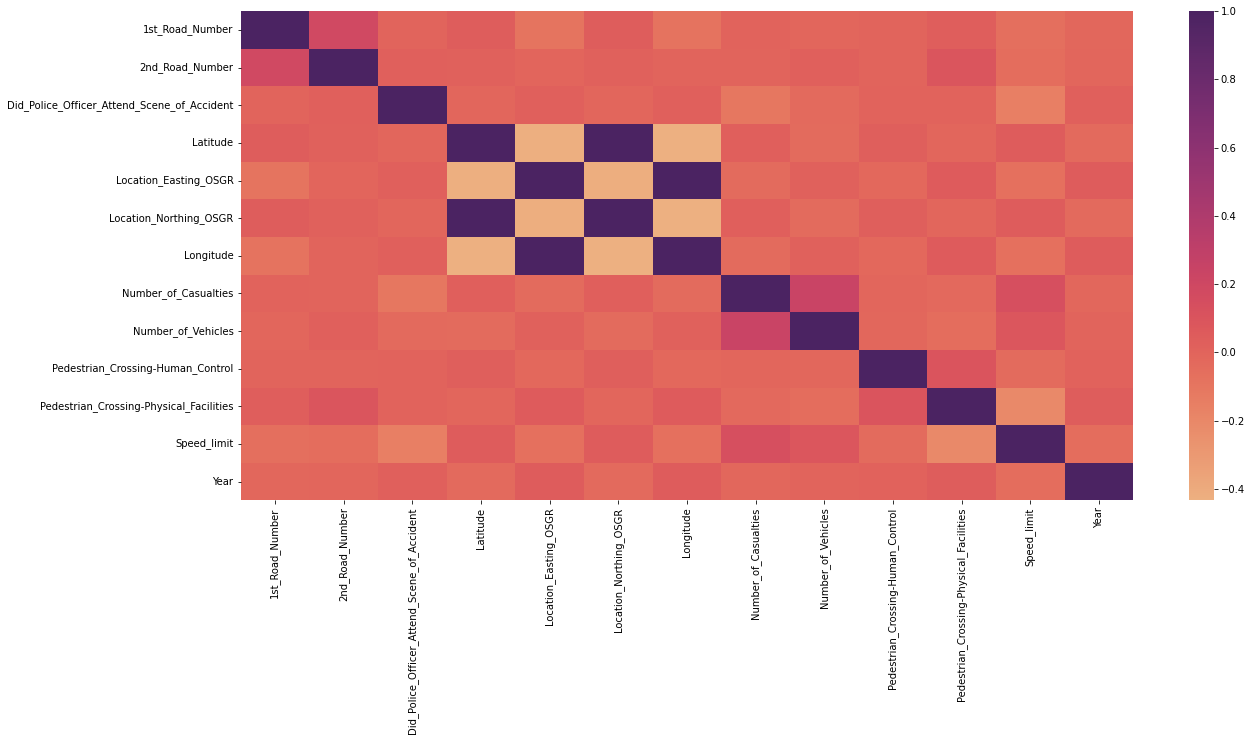

In [32]:
corr =  accidents.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, cmap="flare")

In [ ]:
accidents_time = accidents[['Date', 'Day_of_Week', 'Time']]
accidents_time.head()

***Has the number of accidents increased or decreased over the last few years?***

In [ ]:
# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(15,6))

# plot
accidents.set_index('Date').resample('M').size().plot(label='Total per Month', color='grey', ax=ax)
accidents.set_index('Date').resample('M').size().rolling(window=10).mean()\
                           .plot(color='dodgerblue', linewidth=5, label='10-Months Moving Average', ax=ax)

ax.set_title('Accidents per Month', fontsize=14, fontweight='bold')
ax.set(ylabel='Total Count\n', xlabel='')
ax.legend(bbox_to_anchor=(1.1, 1.1), frameon=False)

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=False);

In [ ]:
yearly_count = accidents['Date'].dt.year.value_counts().sort_index(ascending=False)

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,5))

# plot
ax.bar(yearly_count.index, yearly_count.values, color='lavender')
ax.plot(yearly_count, linestyle=':', color='c')
ax.set_title('\nAccidents per Year\n', fontsize=14, fontweight='bold')
ax.set(ylabel='\nTotal Counts')

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

# LOCATION

***How are accidents related to weather conditions?***

> Preparing dataframe that calculates average accidents per weekday

In [ ]:
accidents.Weather_Conditions.value_counts(normalize=True)

As most of the days the Weather_Condition is "fine" (=1), most accidents will likely to be happen then.

**What percentage of each category of accident severity do we have?**

In [ ]:
accidents.Accident_Severity.value_counts()

> Plotting this dataframe:

In [ ]:
# assign the data
fatal   = accidents.Accident_Severity.value_counts()['Fatal']
serious = accidents.Accident_Severity.value_counts()['Serious']
slight  = accidents.Accident_Severity.value_counts()['Slight']

names = ['Fatal Accidents','Serious Accidents', 'Slight Accidents']
size  = [fatal, serious, slight]

# create a pie chart
plt.pie(x=size, labels=names, colors=['b', 'darkblue', 'dodgerblue'], 
        autopct='%1.2f%%', pctdistance=0.6, textprops=dict(fontweight='bold'),
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(8,8)
fig.gca().add_artist(my_circle)
plt.title('\nAccident Severity: Share in % (2013-2017)', fontsize=14, fontweight='bold')
plt.show()

**How has the number of fatalities developed over the years?**

In [ ]:
# set the criterium to slice the fatalaties
criteria = accidents['Accident_Severity']=='Fatal'
# create a new dataframe
weekly_fatalities = accidents.loc[criteria].set_index('Date').sort_index().resample('W').size()

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(14,6))

# plot
weekly_fatalities.plot(label='Total Fatalities per Month', color='dodgerblue', ax=ax)
plt.fill_between(x=weekly_fatalities.index, y1=weekly_fatalities.values, color='lightsteelblue', alpha=0.3)
weekly_fatalities.rolling(window=10).mean()\
                           .plot(color='midnightblue', linewidth=5, label='10-Months Moving Average', ax=ax)

ax.set_title('\nLes Fatalités', fontsize=14, fontweight='bold')
ax.set(ylabel='\nTotal Count', xlabel='')
ax.legend(bbox_to_anchor=(1.2, 1.1), frameon=False)

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

In [ ]:
district_top_10 = pd.DataFrame(accidents['Local_Authority_(District)'].value_counts()).sort_values('Local_Authority_(District)', ascending = False)[:10].reset_index()
district_top_10 = district_top_10.rename(columns={'index': 'city', 'Local_Authority_(District)': 'accidents'})
district_top_10

> **Par quartier**

*Représentation du nombre d'accidents selon les quartiers*

In [ ]:
def get_district(code):
  if code == 300:
    return 'Birmingham'
  elif code == 204:
    return 'Leeds'
  elif code == 102:
    return 'Manchester'
  elif code == 1:
    return 'Westminster'
  elif code == 200:
    return 'Bradford'
  elif code == 91:
    return 'Liverpool'
  elif code == 215:
    return 'Sheffield'
  elif code == 601:
    return 'Bristol'
  elif code == 9:
    return 'Lambeth'
  elif code == 203:
    return 'Kirklees'

In [ ]:
pal = list(sns.color_palette(palette='Blues', n_colors=len(district_top_10['city'])).as_hex())
lowerLimit = 0
max_v = district_top_10['accidents'].max()

plt.figure(figsize=(12,12))
ax = plt.subplot(111, polar=True)
plt.axis()
    
heights = district_top_10['accidents']
width = 2*np.pi / len(district_top_10.index)

indexes = list(range(1, len(district_top_10.index)+1))
angles = [element * width for element in indexes]

bars = ax.bar(x=angles, height=heights, width=width, bottom=lowerLimit,
              linewidth=1, edgecolor="white", color=pal)
    
labelPadding = 2

for bar, angle, height, label in zip(bars, angles, heights, district_top_10['city']):
    rotation = np.rad2deg(angle)
    alignment = ""
      
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    ax.text(x=angle, y=lowerLimit + bar.get_height() + labelPadding,
            s=label, ha=alignment, va='center', rotation=rotation, 
            rotation_mode="anchor")
    
    ax.set_thetagrids([], labels=[])
    plt.title('Number of accidents by district')
    ax

# ROAD CHARACTERISTICS & FACILITIES



# Type of Junction

In [18]:
# manually rename junction details since names in lookup are too long & take lots of space
junction_detail_names = {0: "No junction/within 20m",\
                         1: "Roundabout",\
                         2: "Mini-roundabout",\
                         3: "T/staggered junction",\
                         5: "Slip road",\
                         6: "Crossroads",\
                         7: ">4 arms(not roundabout)",\
                         8: "Private drive/enterence",\
                         9: "other junction",\
                         99: "unknown(self-reported)",\
                         -1: "data missing/out of range"}
accidents.Junction_Detail = accidents.Junction_Detail.replace(junction_detail_names)

# shrink junction detail name text for pie plots
junction_detail_names = {"No junction/within 20m": "no junction",\
                         "Mini-roundabout": "others",\
                         "T/staggered junction": "T / Staggered",\
                         "Slip road": "others",\
                         ">4 arms(not roundabout)": "others",\
                         "Private drive/enterence": "others",\
                         "other junction": "others",\
                         "unknown(self-reported)": "others",\
                         "data missing/out of range": "others"}

**Accidents in Each Junction Type (Urban & Rural Areas)**

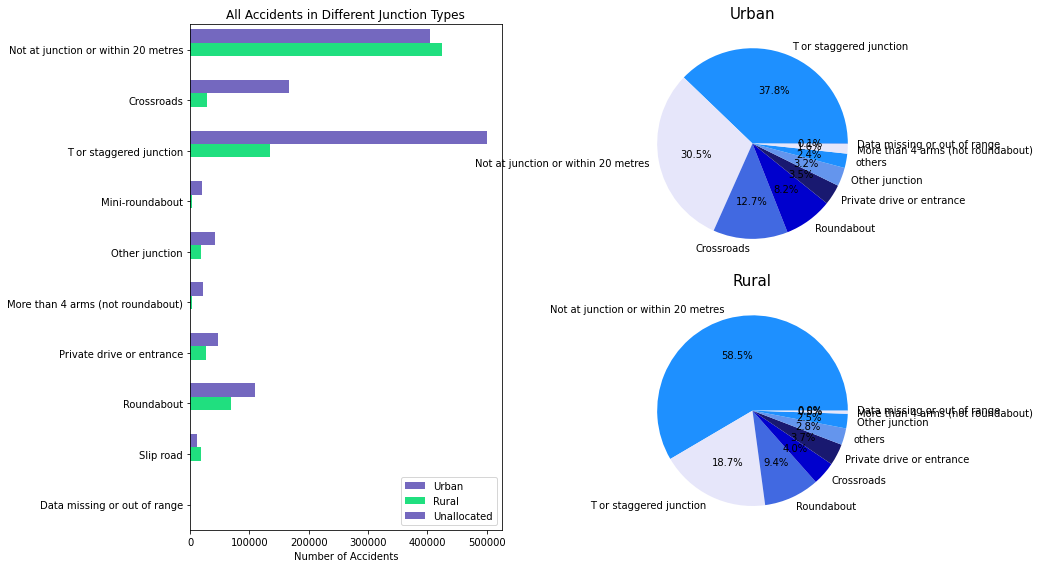

In [22]:
# make figure
plt.figure(figsize=(14,8))
ax = plt.gca()

# make grids
grid_layout = gs.GridSpec(2,2)
left = plt.subplot(grid_layout[:,0])
right_top = plt.subplot(grid_layout[0, 1])
right_bottom = plt.subplot(grid_layout[1, 1])

# make horizontal countplot
sns.countplot(y="Junction_Detail", hue="Urban_or_Rural_Area", ax=left,\
              data=accidents, palette=urban_rural_cmap)
left.set_xlabel("Number of Accidents")
left.set_ylabel("")
left.set_title("All Accidents in Different Junction Types")
left.legend(loc="lower right")

# plot upper right pie
data = accidents[accidents.Urban_or_Rural_Area=="Urban"].Junction_Detail
data = data.replace(junction_detail_names).value_counts()
data.plot.pie(autopct="%.1f%%", ax=right_top,\
              colors=["dodgerblue", "lavender", "royalblue", "mediumblue", "midnightblue", "cornflowerblue"])
right_top.set_ylabel("")
right_top.set_title("Urban", fontsize=15)

# plot lower right pie
data = accidents[accidents.Urban_or_Rural_Area=="Rural"].Junction_Detail
data = data.replace(junction_detail_names).value_counts()
data.plot.pie(autopct="%.1f%%", ax=right_bottom,\
              colors=["dodgerblue", "lavender", "royalblue", "mediumblue", "midnightblue", "cornflowerblue"])
right_bottom.set_ylabel("")
right_bottom.set_title("Rural", fontsize=15)

plt.tight_layout()


Is there any junction control conditions that make a junction more suspectible to accidents?

In [14]:
# manually rename junction control since names in lookup are too long
junction_control_name = {-1: "Data missing/out of range",\
                          1: "Authorised person",\
                          2: "Auto traffic signal",\
                          3: "Stop sign",\
                          4: "Give way/uncontrolled",\
                          9: "unknown(self-reported)"}
accidents.Junction_Control = accidents.Junction_Control.replace(junction_control_name)


***Fatal Accident Percent for Each Special Condition***

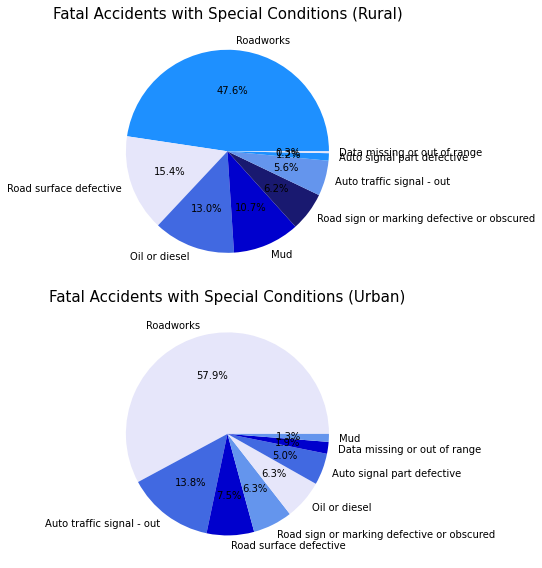

In [21]:
fig, (top, bottom) = plt.subplots(2,1, figsize=(10,8))

# for rural area
data = accidents.query("((Special_Conditions_at_Site!='None') & (Accident_Severity=='Fatal'))\
                            & (Urban_or_Rural_Area=='Rural')")
data.Special_Conditions_at_Site.value_counts().plot.pie(autopct="%.1f%%", ax=top,\
                                colors=["dodgerblue", "lavender", "royalblue", "mediumblue", "midnightblue", "cornflowerblue"])
top.set_ylabel('')
top.set_title("Fatal Accidents with Special Conditions (Rural)", fontsize=15)

# for urban area
data = accidents.query("((Special_Conditions_at_Site!='None') & (Accident_Severity=='Fatal'))\
                            & (Urban_or_Rural_Area=='Urban')")
data.Special_Conditions_at_Site.value_counts().plot.pie(autopct="%.1f%%", ax=bottom,\
                                colors=["lavender", "royalblue", "mediumblue", "cornflowerblue"])
bottom.set_ylabel('')
bottom.set_title("Fatal Accidents with Special Conditions (Urban)", fontsize=15)

plt.tight_layout()